In [1]:
# importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition

In [2]:
# Importation des données

df = pd.read_csv('Iris.csv')


In [3]:
# Affichage du modele
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
# Decrire les données
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [7]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
# Fractionner les données en features(X) et target(Y)
X_n = df.drop("Species", axis=1)
X = X_n.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Visualisation en 2D

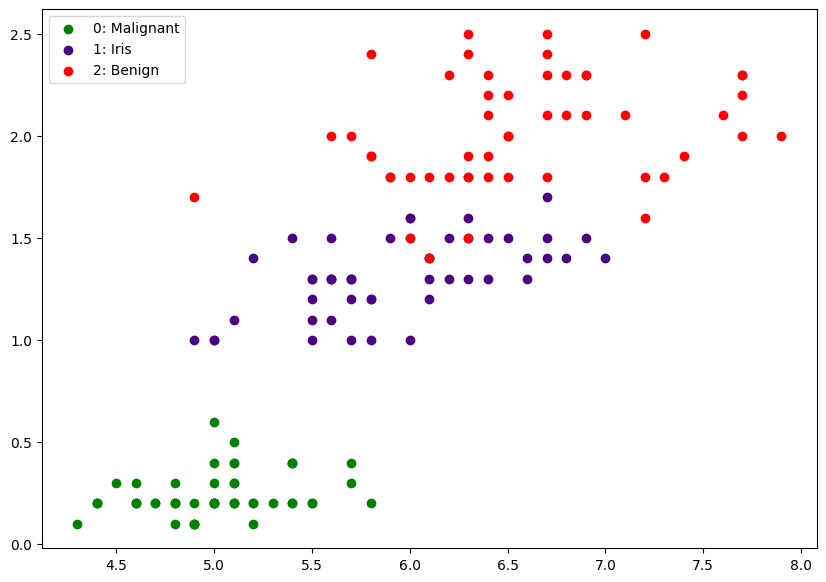

In [9]:
plt.figure(figsize=(10,7))
plt.scatter(df['SepalLengthCm'][df['Species'] == 0], df['PetalWidthCm'][df['Species'] == 0], c='green',label='0: Malignant' )
plt.scatter(df['SepalLengthCm'][df['Species'] == 1], df['PetalWidthCm'][df['Species'] == 1], c='indigo',label='1: Iris' )
plt.scatter(df['SepalLengthCm'][df['Species'] == 2], df['PetalWidthCm'][df['Species'] == 2], c='red',label='2: Benign' )
plt.legend()
plt.show()

Visualisation en 3D

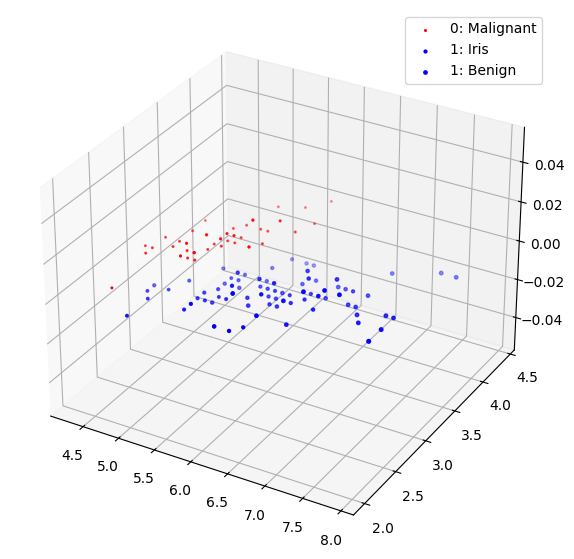

In [10]:
plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
plt.scatter(df['SepalLengthCm'][df['Species'] == 0], df['SepalWidthCm'][df['Species'] == 0], df['PetalLengthCm'][df['Species'] == 0],c='r',label='0: Malignant' )
plt.scatter(df['SepalLengthCm'][df['Species'] == 1], df['SepalWidthCm'][df['Species'] == 1], df['PetalLengthCm'][df['Species'] == 1],c='b',label='1: Iris' )
plt.scatter(df['SepalLengthCm'][df['Species'] == 2], df['SepalWidthCm'][df['Species'] == 2], df['PetalLengthCm'][df['Species'] == 2],c='b',label='1: Benign' )

plt.legend()
plt.show()

In [11]:
# mettre les valeurs dans une même echelle ou la normalisation
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_norm = scaler.fit_transform(X)

In [12]:
pca = decomposition.PCA()
pca.fit(X_norm)
X_pca = pca.transform(X_norm)
print(pca.explained_variance_ratio_)
np.round(sum(pca[:,:2].explained_variance_ratio_)*100,2)

[0.72770452 0.23030523 0.03683832 0.00515193]


TypeError: 'PCA' object is not subscriptable

In [ ]:
# Part de variance des 2 composantes

cumulative_variance = np.round(np.sum(pca.explained_variance_ratio_[:2])*100,2)
cumulative_variance

proportions de variance expliquée par chaque composante principale, le premier axe a le maximun d'information

Les deux premieres dimensions refletent 95% ((0.77 + 0.23)*100)  de l'information donc ils seront les axes d'analyse

In [ ]:
colonne =["Dim1", "Dim2"]
data = pd.DataFrame(X_pca[:, :2], columns = colonne)


In [ ]:
data['espece'] = df['Species'].values
data

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(data['Dim1'][data['espece'] == 0], data['Dim2'][data['espece'] == 0], c = "r", label = '0: No Iris')
plt.scatter(data["Dim1"][data["espece"] == 1], data["Dim2"][data["espece"] == 1], c = "b", label='1: Iris')
plt.xlabel("Dim1")
plt.legend()
plt.ylabel("Dim2")
plt.title("Represention fleur Iris en 2 dimension")